<a href="https://colab.research.google.com/github/kanishkagargg/Superstore_sales_customer_segmentation/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

#### Task 1 - Basic CleanUp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics
import matplotlib.pyplot as pyplot
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
import scipy.stats as stats
from scipy.stats import expon
!pip install fitter
from fitter import Fitter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
Superstore_Data = pd.read_csv('/content/drive/MyDrive/superstore_data.csv',encoding="ISO-8859-1")

In [ ]:
# Dataset First Look
Superstore_Data.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3  11-05-2014        0        10  ...                0                 0   
4  08-04-2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                  6                  1         1         0  
1                  7                  5         1         0  
2                  5                  2         0         0  
3                  2                  7         0         0  
4                  2                  7         1         0  

[5 rows x 22 columns]

In [ ]:
# Number of rows and columns in dataset
Superstore_Data.shape

In [ ]:
# information about Null values and data type of different columns
Superstore_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Number of duplicate rows
len(Superstore_Data[Superstore_Data.duplicated()])

0

In [ ]:
# Number of null values for each of the column
Superstore_Data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
# Number of unique values for each of the column
for i in Superstore_Data.columns.tolist():
  print("No. of unique values in ",i,"is",Superstore_Data[i].nunique(),".")

No. of unique values in  Id is 2240 .
No. of unique values in  Year_Birth is 59 .
No. of unique values in  Education is 5 .
No. of unique values in  Marital_Status is 8 .
No. of unique values in  Income is 1974 .
No. of unique values in  Kidhome is 3 .
No. of unique values in  Teenhome is 3 .
No. of unique values in  Dt_Customer is 663 .
No. of unique values in  Recency is 100 .
No. of unique values in  MntWines is 776 .
No. of unique values in  MntFruits is 158 .
No. of unique values in  MntMeatProducts is 558 .
No. of unique values in  MntFishProducts is 182 .
No. of unique values in  MntSweetProducts is 177 .
No. of unique values in  MntGoldProds is 213 .
No. of unique values in  NumDealsPurchases is 15 .
No. of unique values in  NumWebPurchases is 15 .
No. of unique values in  NumCatalogPurchases is 14 .
No. of unique values in  NumStorePurchases is 14 .
No. of unique values in  NumWebVisitsMonth is 16 .
No. of unique values in  Response is 2 .
No. of unique values in  Complain is 

There are only 24 null values in Income and 0 duplicate rows. So we will fill those NA values with the median of income as later we will see that there are some outliers in income and we do not want to have an effect of that outlier in computation.

Also, some data types also needs to be changed. Like - Dt_Customer and Year_Birth needs to be chnaged to date format so that we can calculate customer age and customer-company age. ID needs to be converted into string. Kidhome, Complain, Response needs to be converted into categorical rather than integer. Also, I would like to convert Kidhome and Teenhome to categorical type as there are 3 unique values for each of them.

In [ ]:
# Replacing null values in income with mediam
Superstore_Data['Income'] = Superstore_Data['Income'].fillna(value= Superstore_Data['Income'].median())

In [ ]:
# Converting data type of the following to date and time format
Superstore_Data['Dt_Customer'] = pd.to_datetime(Superstore_Data['Dt_Customer'])
Superstore_Data['Year_Birth'] = pd.to_datetime(Superstore_Data['Year_Birth'], format='%Y')

In [ ]:
# Converting data type of the following to string/category
Superstore_Data['Id'] = Superstore_Data['Id'].astype(str)
Superstore_Data['Kidhome'] = Superstore_Data['Kidhome'].astype('category')
Superstore_Data['Teenhome'] = Superstore_Data['Teenhome'].astype('category')
Superstore_Data['Complain'] = Superstore_Data['Complain'].astype('category')
Superstore_Data['Response'] = Superstore_Data['Response'].astype('category')

In [ ]:
# Adding a column of 'Customer_Age' by calculating ages from Year_Birth

birth_date = list(Superstore_Data['Year_Birth'])
Ages = []
today = date.today()
for dates in birth_date:
  birth_date = dates
  age = relativedelta(today, birth_date)
  Ages.append(age.years)

Superstore_Data['Customer_Age'] = Ages
Superstore_Data.head()

Id Year_Birth   Education Marital_Status   Income Kidhome Teenhome  \
0   1826 1970-01-01  Graduation       Divorced  84835.0       0        0   
1      1 1961-01-01  Graduation         Single  57091.0       0        0   
2  10476 1958-01-01  Graduation        Married  67267.0       0        1   
3   1386 1967-01-01  Graduation       Together  32474.0       1        1   
4   5371 1989-01-01  Graduation         Single  21474.0       1        0   

  Dt_Customer  Recency  MntWines  ...  MntSweetProducts  MntGoldProds  \
0  2014-06-16        0       189  ...               189           218   
1  2014-06-15        0       464  ...                 0            37   
2  2014-05-13        0       134  ...                 2            30   
3  2014-11-05        0        10  ...                 0             0   
4  2014-08-04        0         6  ...                 0            34   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

   NumWebVisitsMonth  Response  Complain  Customer_Age  
0                  1         1         0            53  
1                  5         1         0            62  
2                  2         0         0            65  
3                  7         0         0            56  
4                  7         1         0            34  

[5 rows x 23 columns]

In [ ]:
# Adding a column of 'Customer_company_age' by calculating ages from Dt_Customer

Dt_date = list(Superstore_Data['Dt_Customer'])
Customer_company_age = []
today = date.today()
for dates in Dt_date:
  Dt_date = dates
  age = relativedelta(today, Dt_date)
  Customer_company_age.append(age.years)

Superstore_Data['Customer_company_age'] = Customer_company_age
Superstore_Data.head()

Id Year_Birth   Education Marital_Status   Income Kidhome Teenhome  \
0   1826 1970-01-01  Graduation       Divorced  84835.0       0        0   
1      1 1961-01-01  Graduation         Single  57091.0       0        0   
2  10476 1958-01-01  Graduation        Married  67267.0       0        1   
3   1386 1967-01-01  Graduation       Together  32474.0       1        1   
4   5371 1989-01-01  Graduation         Single  21474.0       1        0   

  Dt_Customer  Recency  MntWines  ...  MntGoldProds  NumDealsPurchases  \
0  2014-06-16        0       189  ...           218                  1   
1  2014-06-15        0       464  ...            37                  1   
2  2014-05-13        0       134  ...            30                  1   
3  2014-11-05        0        10  ...             0                  1   
4  2014-08-04        0         6  ...            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   Response  Complain  Customer_Age  Customer_company_age  
0         1         0            53                     9  
1         1         0            62                     9  
2         0         0            65                     9  
3         0         0            56                     9  
4         1         0            34                     9  

[5 rows x 24 columns]

#### Task 2 - Descriptive Statistics

In [ ]:
# Showed relevant variables for descriptive analysis and also added columns of Variance, Range, Skewness, Kurtosis of each variable

Descriptive_stats = Superstore_Data.describe(include='all')

tab_info = pd.DataFrame(Descriptive_stats).T.rename(index={0:'column name'})

print ('-' * 10 + " Display information about numeric variables and their descriptive stats " + '-' * 10 )

table1 = tab_info.iloc[4:5,6:]
table2 = tab_info.iloc[8:20,6:]
table4 = tab_info.iloc[22:24,6:]
table5 = pd.concat([table1, table2, table4], axis=0)

tab_info_var = pd.DataFrame(np.var(Superstore_Data).T)
tab_info_range = tab_info['max'] - tab_info['min']
tab_info_skew = pd.DataFrame(Superstore_Data.skew(axis = 0, skipna = True).T)
tab_info_kurt = pd.DataFrame(Superstore_Data.kurt(axis = 0, skipna = True).T)
tab_info = pd.concat([table5, tab_info_var, tab_info_range, tab_info_skew, tab_info_kurt], axis=1)
tab_info.columns.values[7] = 'Variance'
tab_info.columns.values[8] = 'Range'
tab_info.columns.values[9] = 'Skewness'
tab_info.columns.values[10] = 'Kurtosis'
tab_info.iloc[:15,:]


---------- Display information about numeric variables and their descriptive stats ----------


<ipython-input-69-8a237291bddb>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Descriptive_stats = Superstore_Data.describe(include='all')
<ipython-input-69-8a237291bddb>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Descriptive_stats = Superstore_Data.describe(include='all')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of num

mean           std     min       25%      50%  \
Income                52237.975446  25037.955891  1730.0  35538.75  51381.5   
Recency                  49.109375     28.962453     0.0      24.0     49.0   
MntWines                303.935714    336.597393     0.0     23.75    173.5   
MntFruits                26.302232     39.773434     0.0       1.0      8.0   
MntMeatProducts             166.95    225.715373     0.0      16.0     67.0   
MntFishProducts          37.525446     54.628979     0.0       3.0     12.0   
MntSweetProducts         27.062946     41.280498     0.0       1.0      8.0   
MntGoldProds             44.021875     52.167439     0.0       9.0     24.0   
NumDealsPurchases            2.325      1.932238     0.0       1.0      2.0   
NumWebPurchases           4.084821      2.778714     0.0       2.0      4.0   
NumCatalogPurchases       2.662054      2.923101     0.0       0.0      2.0   
NumStorePurchases         5.790179      3.250958     0.0       3.0      5.0   
NumWebVisitsMonth         5.316518      2.426645     0.0       3.0      6.0   
Customer_Age             54.194196     11.984069    27.0      46.0     53.0   
Customer_company_age        9.9375      0.683255     9.0       9.0     10.0   

                           75%       max      Variance     Range  Skewness  \
Income                68289.75  666666.0  6.266194e+08  664936.0  6.800947   
Recency                   74.0      99.0  8.384492e+02      99.0 -0.001987   
MntWines                504.25    1493.0  1.132472e+05    1493.0  1.175771   
MntFruits                 33.0     199.0  1.581220e+03     199.0  2.102063   
MntMeatProducts          232.0    1725.0  5.092468e+04    1725.0  2.083233   
MntFishProducts           50.0     259.0  2.982993e+03     259.0  1.919769   
MntSweetProducts          33.0     263.0  1.703319e+03     263.0  2.136081   
MntGoldProds              56.0     362.0  2.720227e+03     362.0  1.886106   
NumDealsPurchases          3.0      15.0  3.731875e+00      15.0  2.418569   
NumWebPurchases            6.0      27.0  7.717805e+00      27.0  1.382794   
NumCatalogPurchases        4.0      28.0  8.540703e+00      28.0  1.880989   
NumStorePurchases          8.0      13.0  1.056401e+01      13.0  0.702237   
NumWebVisitsMonth          7.0      20.0  5.885977e+00      20.0  0.207926   
Customer_Age              64.0     130.0  1.435538e+02     103.0  0.349944   
Customer_company_age      10.0      11.0  4.666295e-01       2.0  0.079227   

                        Kurtosis  
Income                161.400144  
Recency                -1.201897  
MntWines                0.598744  
MntFruits               4.050976  
MntMeatProducts         5.516724  
MntFishProducts         3.096461  
MntSweetProducts        4.376548  
MntGoldProds            3.551709  
NumDealsPurchases       8.936914  
NumWebPurchases         5.703128  
NumCatalogPurchases     8.047437  
NumStorePurchases      -0.622048  
NumWebVisitsMonth       1.821614  
Customer_Age            0.717464  
Customer_company_age   -0.859594

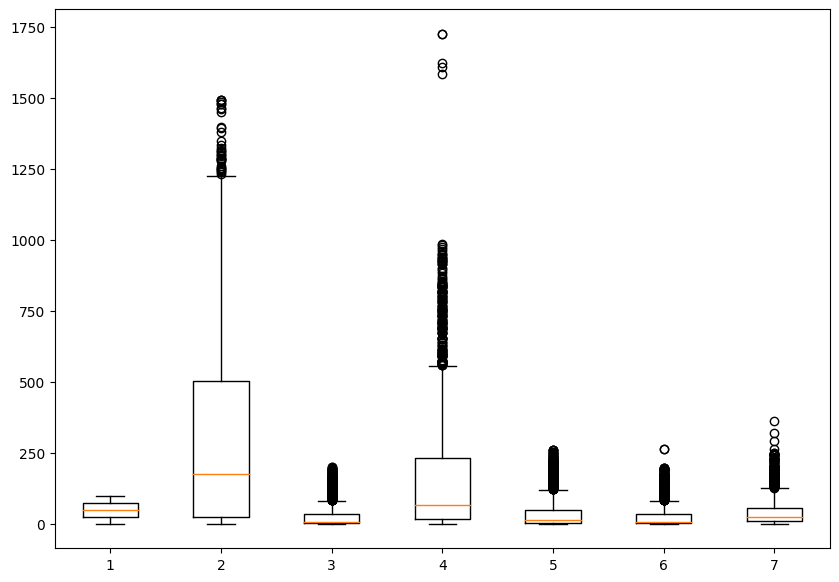

In [ ]:
# Building box plot to identify outliers
data = [Superstore_Data["Recency"],             # 1
        Superstore_Data["MntWines"],            # 2
        Superstore_Data["MntFruits"],           # 3
        Superstore_Data["MntMeatProducts"],     # 4
        Superstore_Data["MntFishProducts"],     # 5
        Superstore_Data["MntSweetProducts"],    # 6
        Superstore_Data["MntGoldProds"]]        # 7
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data)
plt.show()

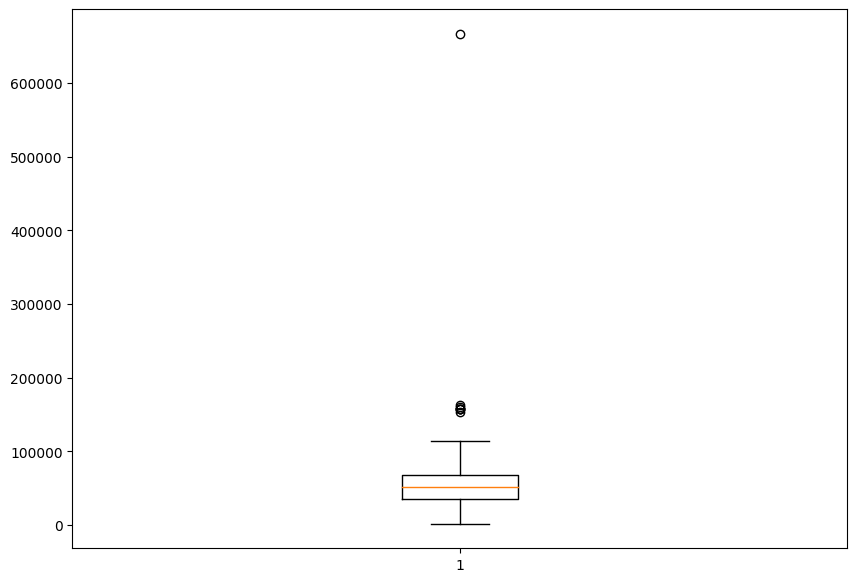

In [ ]:
# Building box plot to identify outliers in Income
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(Superstore_Data["Income"])
plt.show()

Since there is someone with an income above 6,00,000 (which is an outlier), I decided not to remove it as it can be dealt easily while creating ranges of income to create a categorial column out of it. Also, there are some outliers in meat products and that too we will not remove it as it could be beneficial to know that there are some customers who are willing to spend that much amount in that category.

#### Task 3 - Probability Distributions

In the following graphs we will decide different distributions for different variables in the dataset. We will use 'Fitter' for this. By using the sum squared error, we will decide which distributuion fits the most for that variable. Whosever sum squared error will be least, will be choosen as the best.

In [ ]:
# First we define a function in which we pass all the distributions we want for that variable to be checked.

def get_common_distributions():
  """Returns a list of common probability distributions."""

  return [
      'bernoulli',
      'beta',
      'binomial',
      'chi2',
      'expon',
      'gamma',
      'lognorm',
      'norm',
      'poisson',
      'uniform',
      'cauchy',
      'exponpow'
  ]

sumsquare_error          aic          bic    kl_div  ks_statistic  \
uniform         0.000495   923.023970   934.452432  0.025385      0.020310   
beta            0.000559   929.487716   952.344641  0.028199      0.035302   
norm            0.001801   958.363548   969.792010  0.104568      0.068570   
gamma           0.001801   960.363547   977.506240  0.104572      0.068515   
cauchy          0.002903  1016.400902  1027.829364  0.181556      0.130847   

            ks_pvalue  
uniform  3.096966e-01  
beta     7.338903e-03  
norm     1.331705e-09  
gamma    1.377691e-09  
cauchy   6.720817e-34

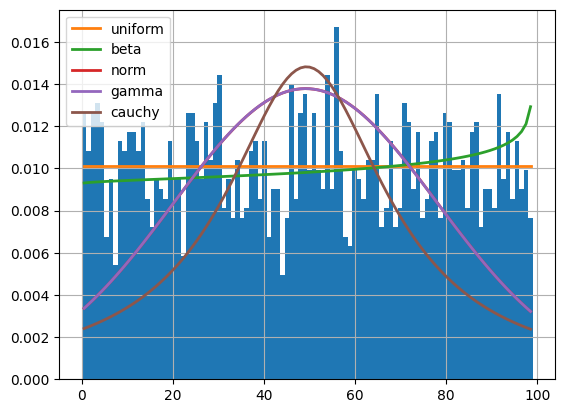

In [ ]:
f = Fitter(Superstore_Data['Recency'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for Recency')
f.fit()
f.summary()

'Recency' follows Uniform distribution as the sum squared error is least among all.

sumsquare_error           aic           bic  kl_div  ks_statistic  \
norm        6.343397e-11  20780.108251  20791.536713     inf      0.053376   
beta        8.242888e-11   6898.219409   6921.076333     inf      0.050272   
lognorm     8.702500e-11   6376.416694   6393.559387     inf      0.050951   
cauchy      3.151985e-10   3198.843217   3210.271680     inf      0.099537   
chi2        4.882780e-10   6819.390283   6836.532976     inf      0.284894   

             ks_pvalue  
norm      5.488475e-06  
beta      2.327992e-05  
lognorm   1.709645e-05  
cauchy    9.006613e-20  
chi2     2.173168e-161

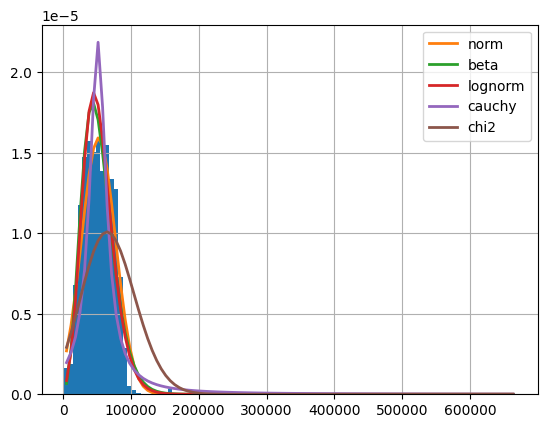

In [ ]:
f = Fitter(Superstore_Data['Income'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for Income')
f.fit()
f.summary()

'Income' follows Normal distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000040  1634.942691  1652.085384     inf      0.080361   
beta             0.000045  1618.674034  1641.530959     inf      0.095067   
exponpow         0.000046  1599.260396  1616.403089     inf      0.096176   
chi2             0.000058  1825.596519  1842.739213     inf      0.208731   
expon            0.000115  1638.585541  1650.014003     inf      0.200793   

             ks_pvalue  
gamma     4.966426e-13  
beta      4.523419e-18  
exponpow  1.740908e-18  
chi2      4.358854e-86  
expon     1.224494e-79

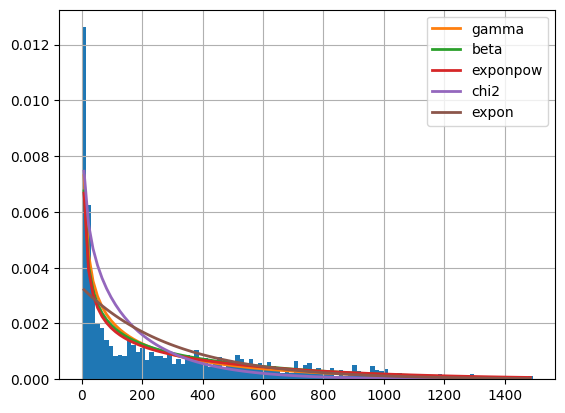

In [ ]:
f = Fitter(Superstore_Data['MntWines'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntWines')
f.fit()
f.summary()

'MntWines' follows Gamma distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.001745  1336.141478  1353.284172     inf      0.178571   
gamma            0.001818  1364.545265  1381.687959     inf      0.178571   
exponpow         0.002369  1300.956208  1318.098901     inf      0.178571   
beta             0.004652  1208.940728  1231.797653     inf      0.178571   
cauchy           0.009186  1549.609523  1561.037986     inf      0.311300   

              ks_pvalue  
chi2       5.830722e-63  
gamma      5.830721e-63  
exponpow   5.830721e-63  
beta       5.830721e-63  
cauchy    2.481272e-193

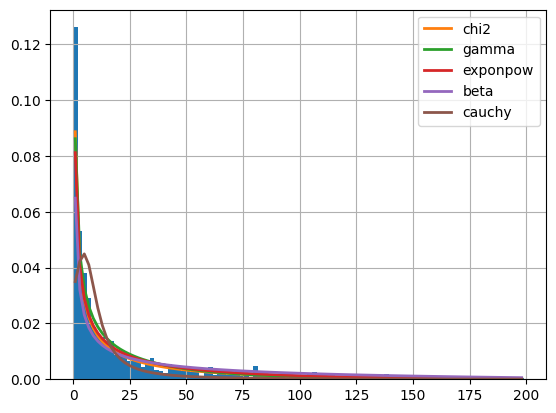

In [ ]:
f = Fitter(Superstore_Data['MntFruits'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntFruits')
f.fit()
f.summary()

'MntFruits' follows Chi-squared distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.000013  1828.842412  1845.985105     inf      0.056853   
beta             0.000049  1902.230428  1925.087353     inf      0.098607   
chi2             0.000049  1886.926062  1904.068756     inf      0.099487   
gamma            0.000050  1886.150300  1903.292994     inf      0.102444   
exponpow         0.000052  1893.219187  1910.361881     inf      0.088901   

             ks_pvalue  
lognorm   9.811954e-07  
beta      2.066459e-19  
chi2      9.422751e-20  
gamma     6.400848e-21  
exponpow  7.454762e-16

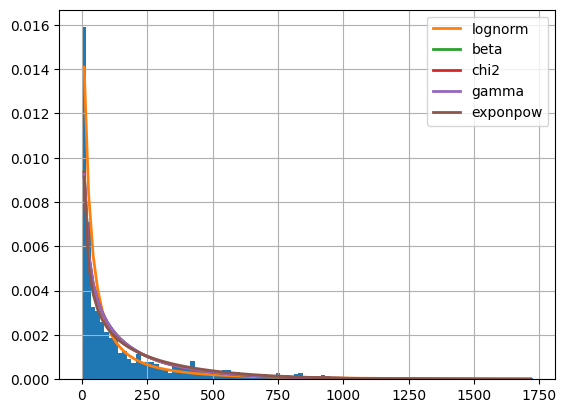

In [ ]:
f = Fitter(Superstore_Data['MntMeatProducts'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntMeatProducts')
f.fit()
f.summary()

'MntMeatProducts' follows Log_Normal distribution. The log-normal distribution is a right skewed continuous probability distribution, meaning it has a long tail towards the right.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.002088  1473.934719  1491.077412     inf      0.171429   
beta             0.002512  1264.283561  1287.140486     inf      0.171429   
exponpow         0.002697  1266.742292  1283.884986     inf      0.171429   
chi2             0.003199  1276.592790  1293.735484     inf      0.188223   
expon            0.005650  1419.202173  1430.630635     inf      0.252200   

              ks_pvalue  
gamma      5.004421e-58  
beta       5.004421e-58  
exponpow   5.004421e-58  
chi2       5.882369e-70  
expon     4.740511e-126

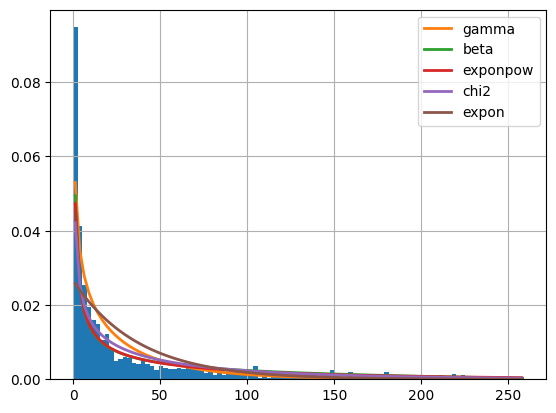

In [ ]:
f = Fitter(Superstore_Data['MntFishProducts'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntFishProducts')
f.fit()
f.summary()

'MntFishProducts' follows Gamma distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma          0.000878  2021.184734  2038.327427     inf      0.270209   
chi2           0.002450  1450.352852  1467.495546     inf      0.187054   
beta           0.002481  1787.905130  1810.762054     inf      0.187054   
cauchy         0.007910  1656.039052  1667.467514     inf      0.313774   
expon          0.008137  1635.441550  1646.870012     inf      0.260368   

            ks_pvalue  
gamma   6.011048e-145  
chi2     4.341905e-69  
beta     4.341903e-69  
cauchy  1.753667e-196  
expon   1.892248e-134

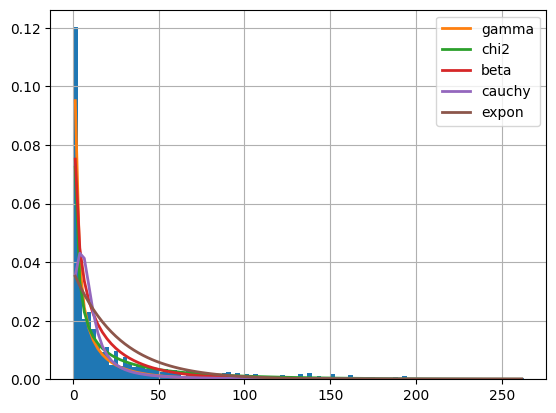

In [ ]:
f = Fitter(Superstore_Data['MntSweetProducts'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntSweetProducts')
f.fit()
f.summary()


'MntSweetProducts' follows Gamma distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.000128  1632.029341  1649.172034     inf      0.064162   
gamma            0.000169  1536.794263  1553.936956     inf      0.069195   
exponpow         0.000332  1455.244003  1472.386696     inf      0.125521   
expon            0.000345  1583.255784  1594.684246     inf      0.096958   
beta             0.000554  1334.347231  1357.204156     inf      0.204426   

             ks_pvalue  
chi2      1.845831e-08  
gamma     9.042581e-10  
exponpow  3.196074e-31  
expon     8.820770e-19  
beta      1.473823e-82

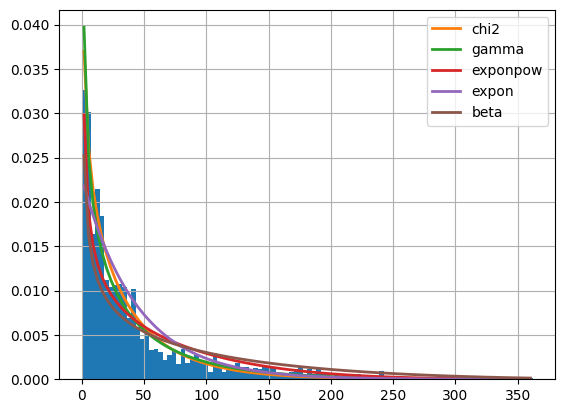

In [ ]:
f = Fitter(Superstore_Data['MntGoldProds'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for MntGoldProds')
f.fit()
f.summary()

'MntGoldProds' follows Chi-squared distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
beta             1.003071  1305.620506  1328.477430     inf      0.361120   
gamma            1.010386  1167.984779  1185.127473     inf      0.262774   
exponpow         1.044352   894.365638   911.508331     inf      0.261607   
chi2             1.064427  1288.194294  1305.336987     inf      0.261607   
expon            1.255523  1251.639123  1263.067585     inf      0.261607   

              ks_pvalue  
beta      3.771960e-262  
gamma     5.615114e-137  
exponpow  9.514604e-136  
chi2      9.514604e-136  
expon     9.514604e-136

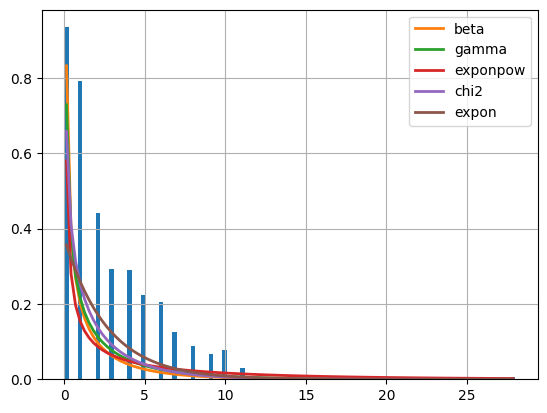

In [ ]:
f = Fitter(Superstore_Data['NumCatalogPurchases'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for NumCatalogPurchases')
f.fit()
f.summary()

'NumCatalogPurchases' follows Beta distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm            2.565294  1303.971579  1315.400042     inf      0.133242   
beta            2.572503  1200.632679  1223.489603     inf      0.140179   
lognorm         2.572944  1191.451453  1208.594146     inf      0.140550   
gamma           2.573680  1180.987655  1198.130348     inf      0.141452   
cauchy          2.615651   793.769129   805.197592     inf      0.153961   

            ks_pvalue  
norm     3.856136e-35  
beta     7.298732e-39  
lognorm  4.555150e-39  
gamma    1.442500e-39  
cauchy   7.860760e-47

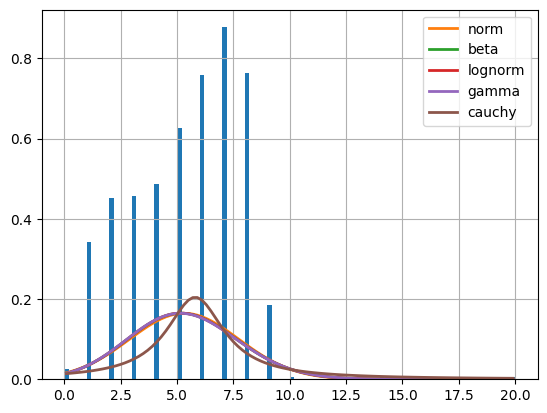

In [ ]:
f = Fitter(Superstore_Data['NumWebVisitsMonth'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for NumWebVisitsMonth')
f.fit()
f.summary()

'NumWebVisitsMonth' follows Normal distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
beta            0.001358  1444.120176  1466.977100     inf      0.052964   
chi2            0.001373  1421.323142  1438.465835     inf      0.054263   
gamma           0.001373  1421.323362  1438.466055     inf      0.054263   
lognorm         0.001384  1421.984962  1439.127655     inf      0.054725   
norm            0.001425  1711.785704  1723.214166     inf      0.059340   

            ks_pvalue  
beta     6.683497e-06  
chi2     3.575003e-06  
gamma    3.574980e-06  
lognorm  2.851659e-06  
norm     2.679619e-07

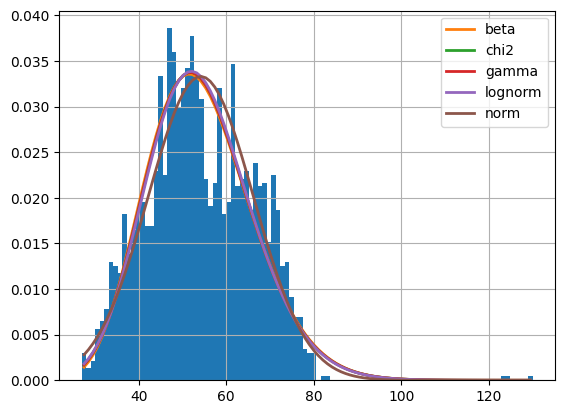

In [ ]:
f = Fitter(Superstore_Data['Customer_Age'],
           distributions= get_common_distributions())
plt.title('Disfferent Distribution Charts for Customer_Age')
f.fit()
f.summary()

'Customer_Age' follows Beta distribution.

In [ ]:
# for variable in list(Superstore_Data.columns[4:]):
#   column = list(Superstore_Data[variable])
#   plt.hist(column)
#   plt.title(variable)
#   plt.xlabel('X-axis')
#   plt.ylabel('Y-axis')
#   plt.show()

#### Task 4 - Insights and Customer Segmentation

<ipython-input-23-55460275505d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(Superstore_Data.corr(), cmap="Blues")


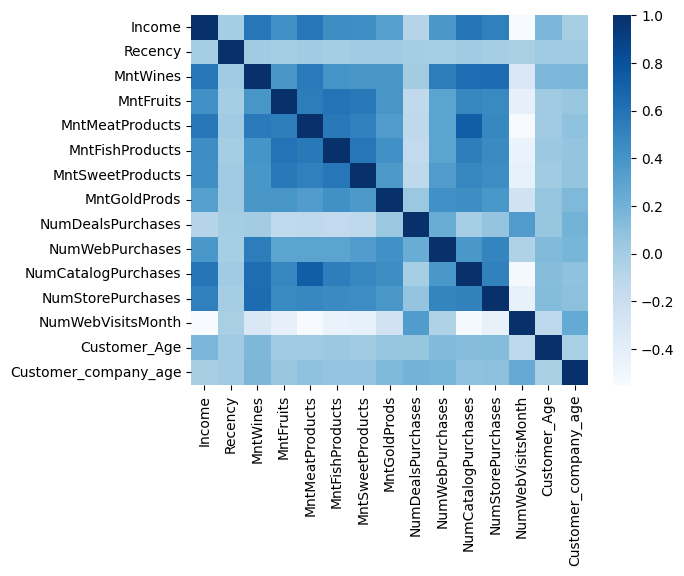

In [ ]:
dataplot = sns.heatmap(Superstore_Data.corr(), cmap="Blues")

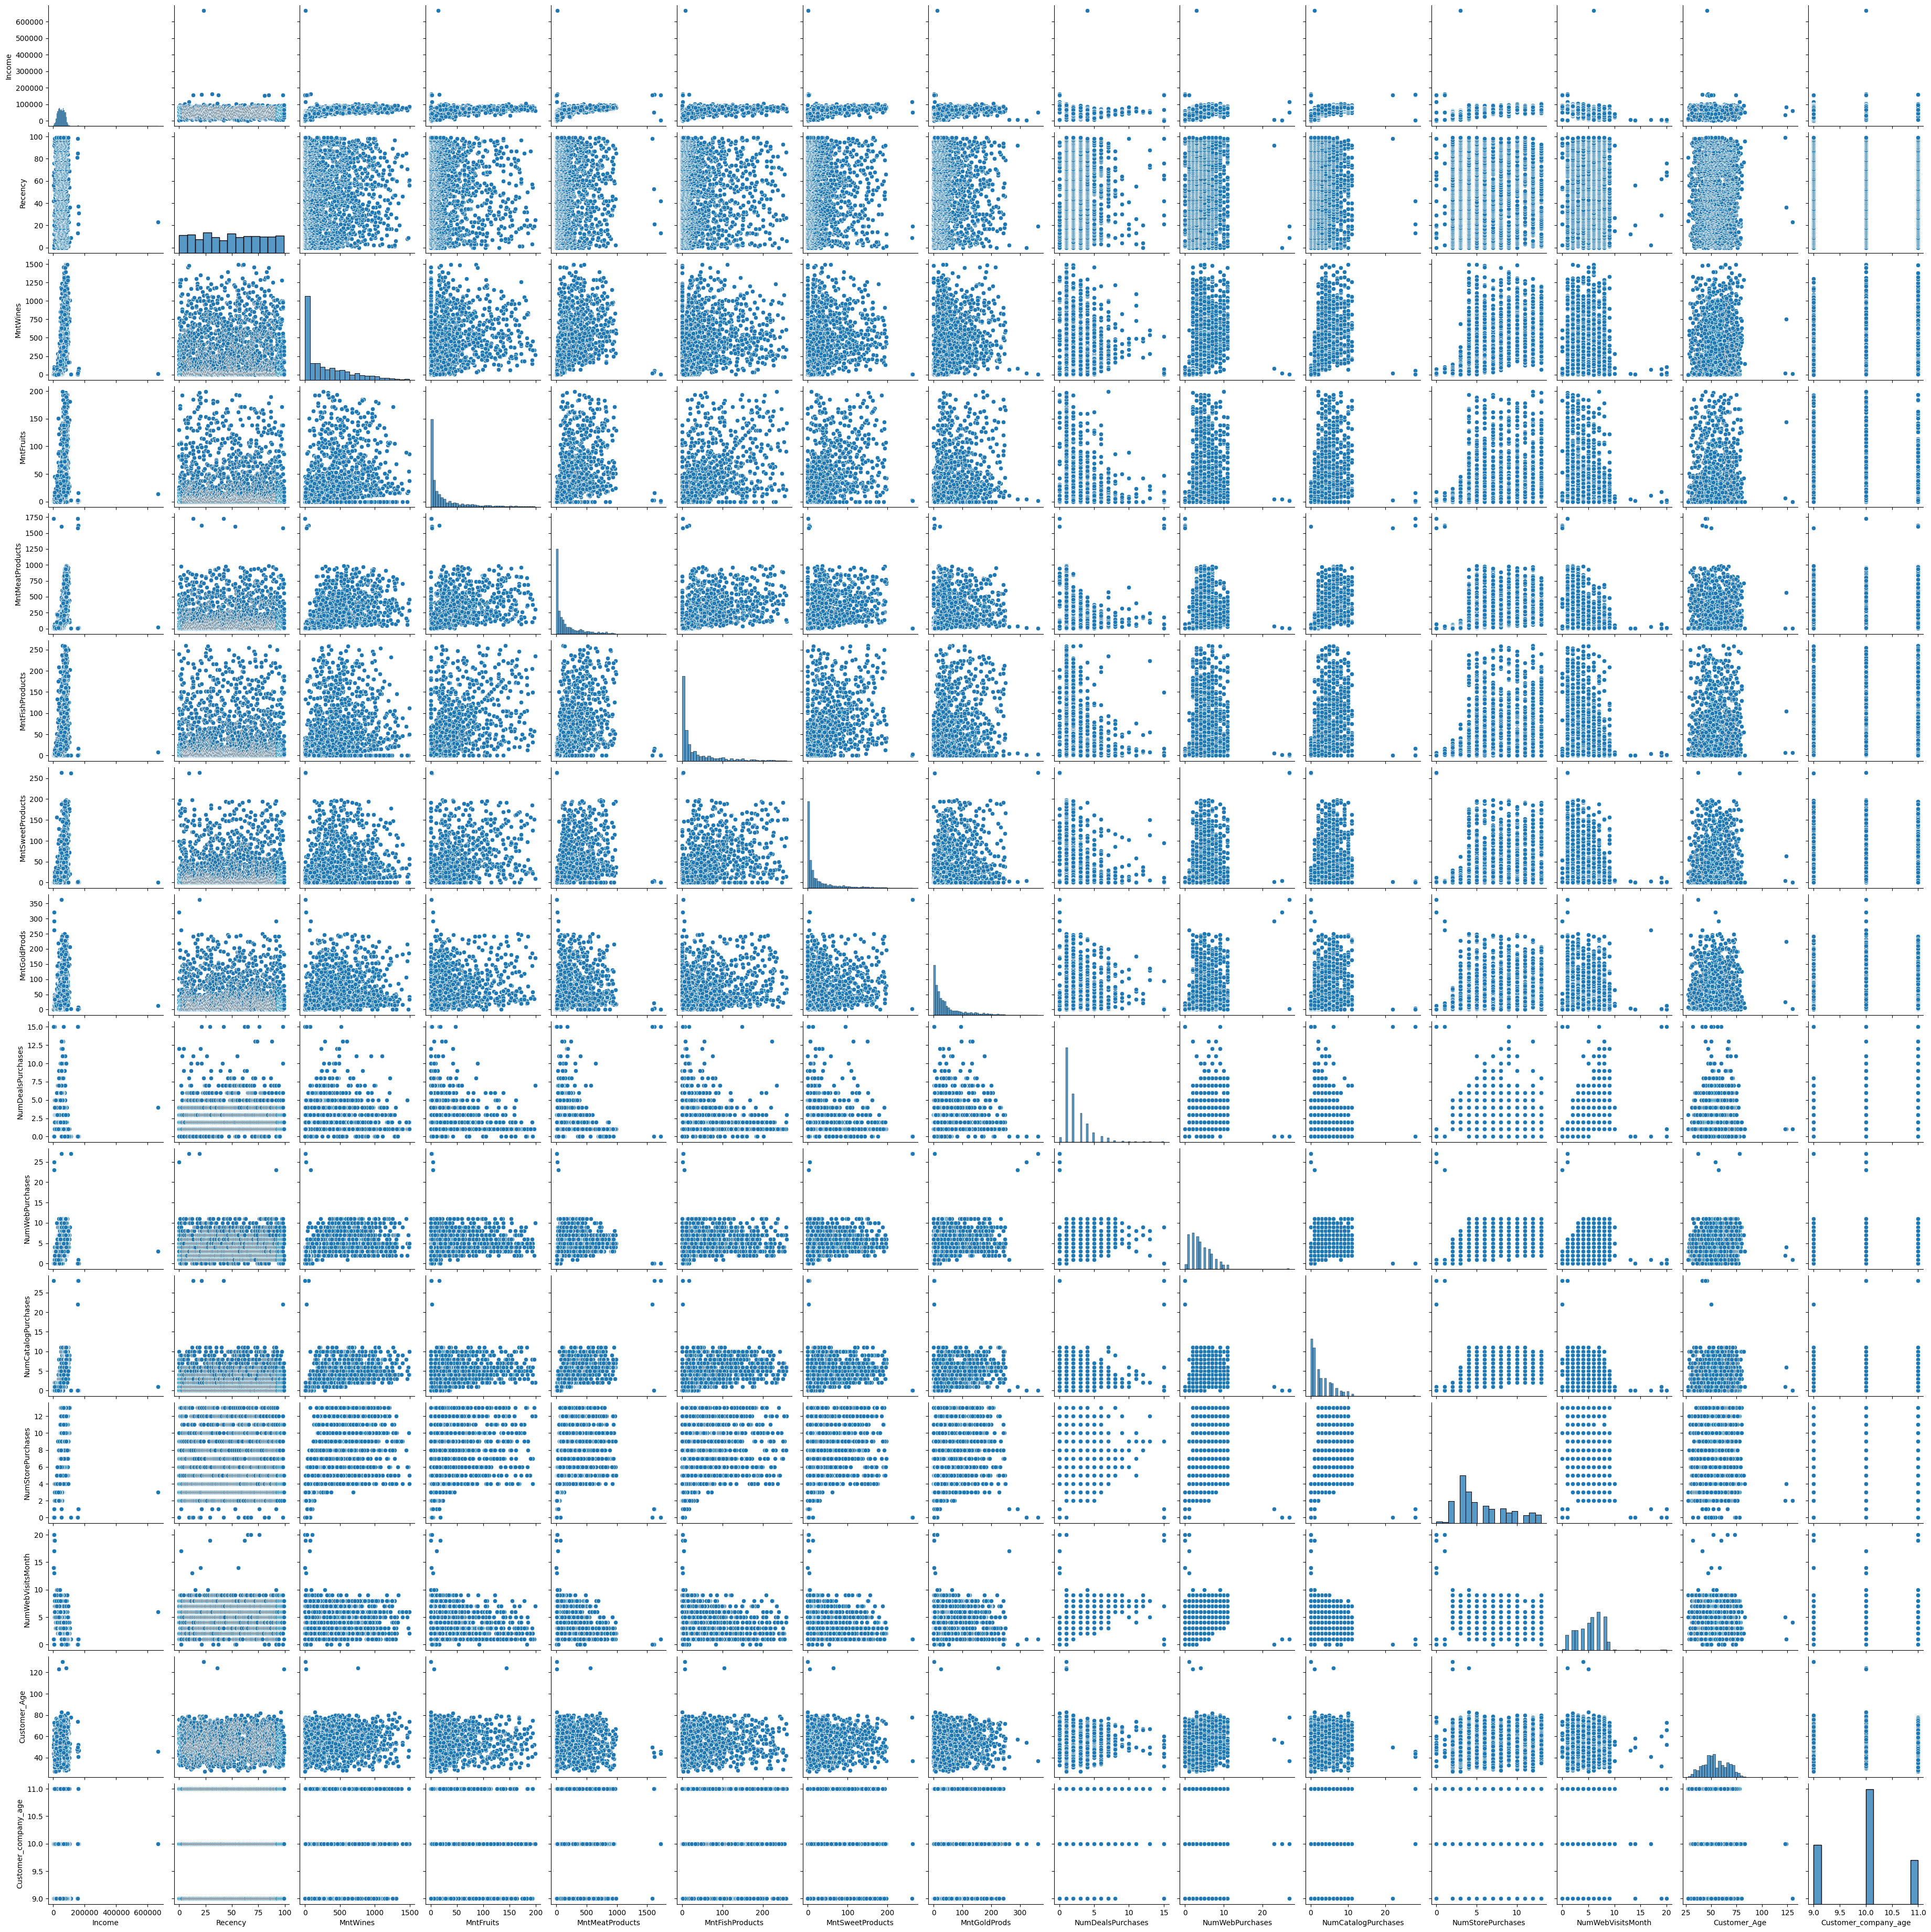

In [ ]:
sns.pairplot(Superstore_Data)

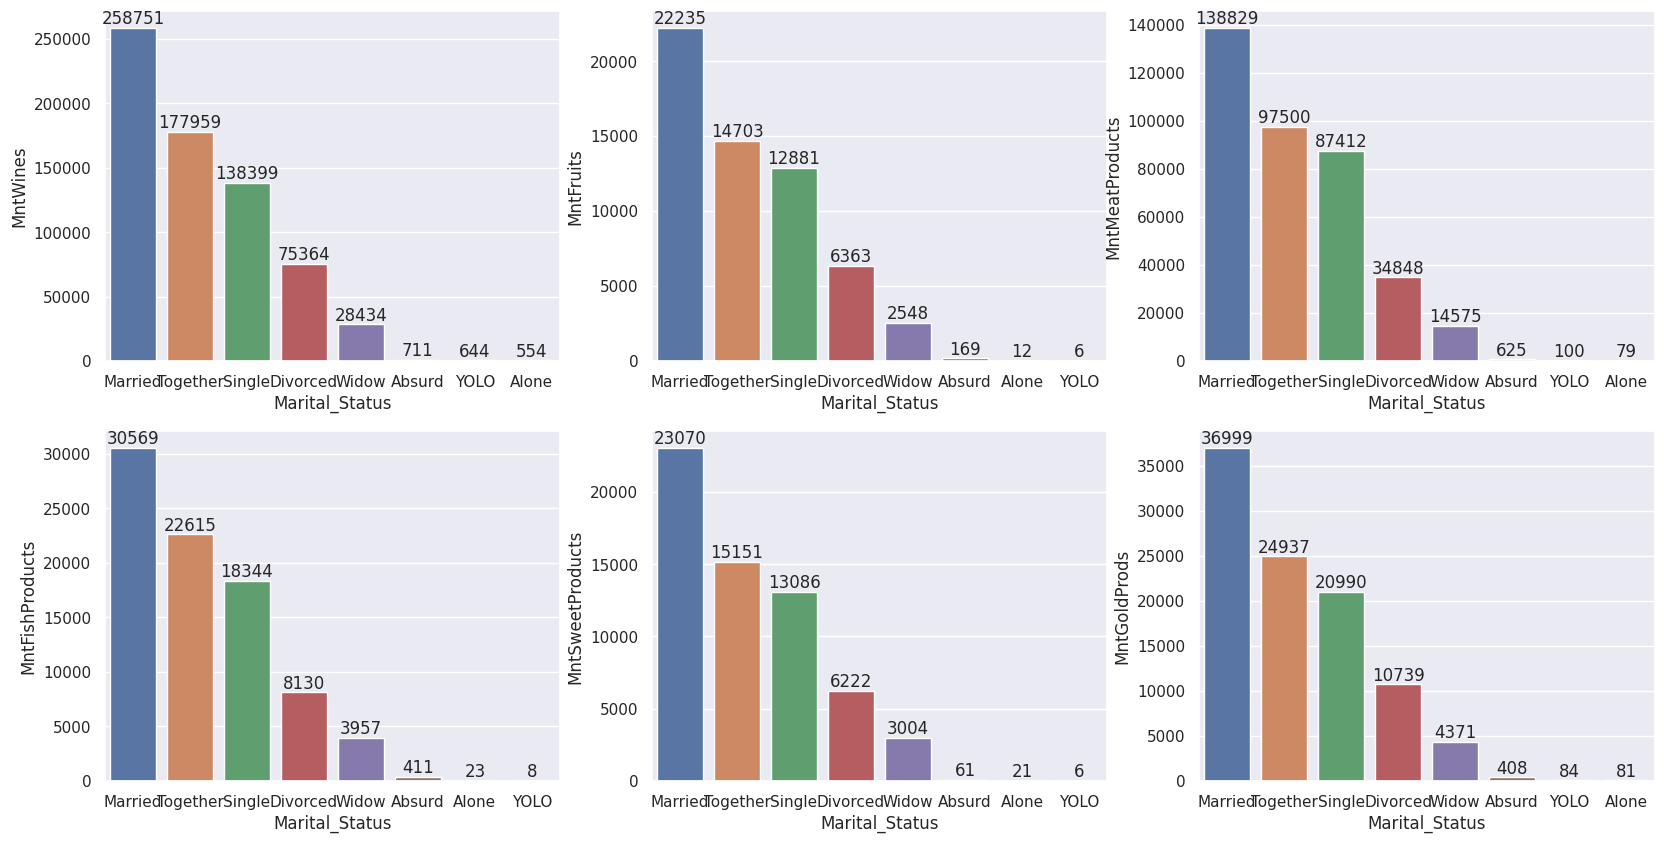

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(20,10)})
mar_wine = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntWines' ,data = mar_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(20,10)})
mar_fruit = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntFruits' ,data = mar_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(20,10)})
mar_meat = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntMeatProducts' ,data = mar_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(20,10)})
mar_fish = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntFishProducts' ,data = mar_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(20,10)})
mar_sweet = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntSweetProducts' ,data = mar_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(20,10)})
mar_gold = Superstore_Data.groupby(['Marital_Status'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Marital_Status', y= 'MntGoldProds' ,data = mar_gold)
for bars in ax.containers:
    ax.bar_label(bars)

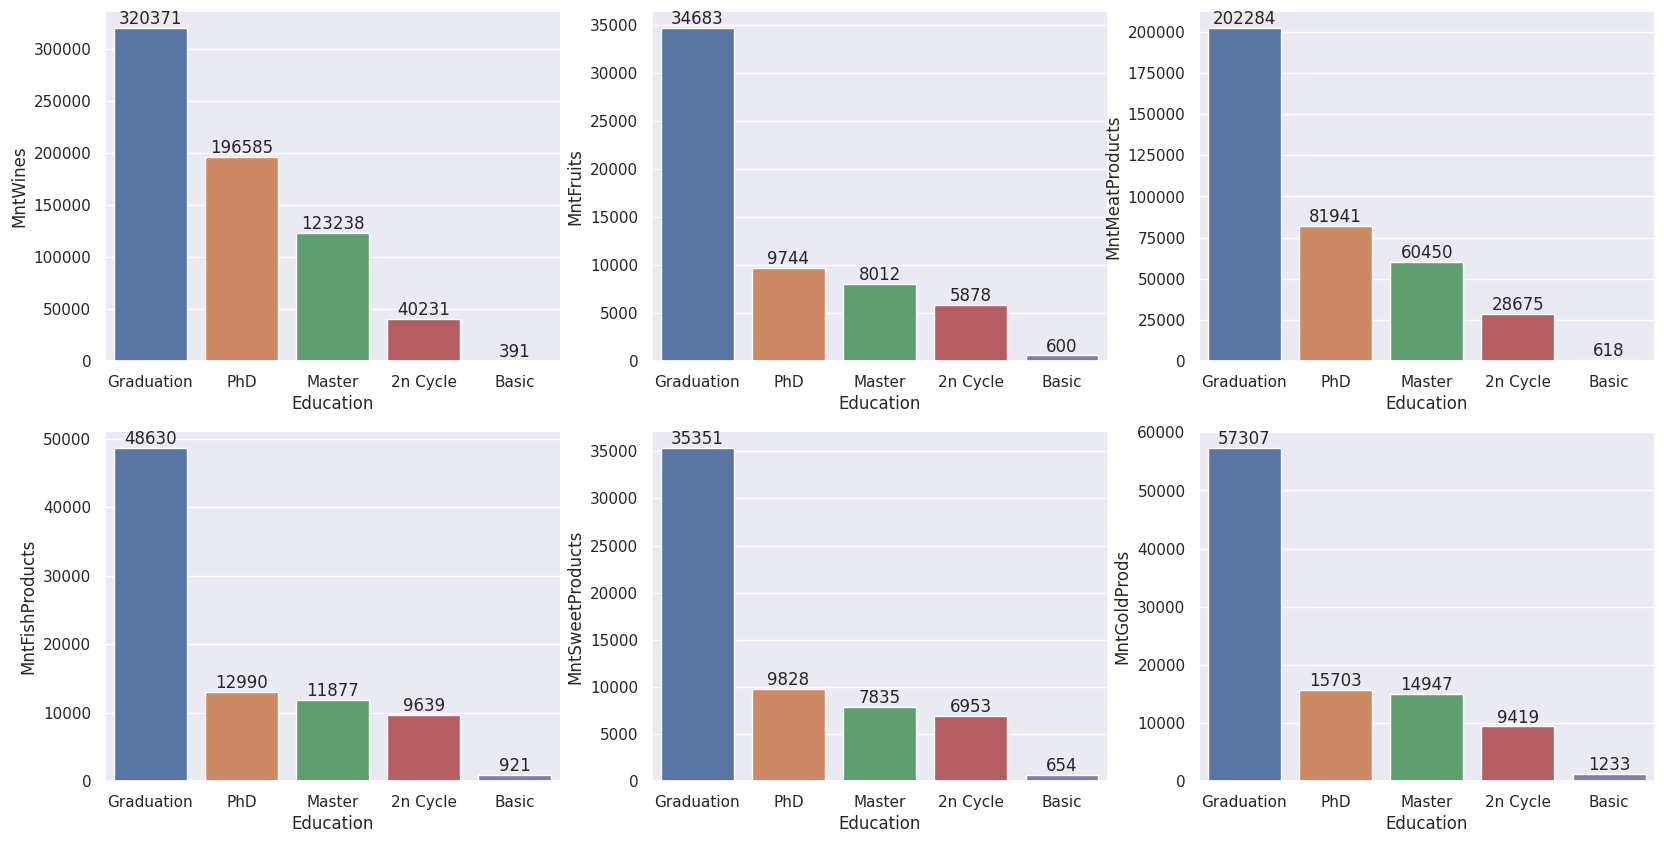

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(20,10)})
edu_wine = Superstore_Data.groupby(['Education'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntWines' ,data = edu_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(20,10)})
edu_fruit = Superstore_Data.groupby(['Education'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntFruits' ,data = edu_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(20,10)})
edu_meat = Superstore_Data.groupby(['Education'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntMeatProducts' ,data = edu_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(20,10)})
edu_fish = Superstore_Data.groupby(['Education'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntFishProducts' ,data = edu_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(20,10)})
edu_sweet = Superstore_Data.groupby(['Education'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntSweetProducts' ,data = edu_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(20,10)})
edu_gold = Superstore_Data.groupby(['Education'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Education', y= 'MntGoldProds' ,data = edu_gold)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
Income = Superstore_Data['Income']
Superstore_Data['Income_Range'] = pd.cut(x = Income, bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 700000],
                     labels=['0-20k', '20k-40k', '40k-60k',
                             '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k', '200k-700k'])
print(Superstore_Data['Income_Range'].value_counts())

40k-60k      667
60k-80k      624
20k-40k      605
80k-100k     204
0-20k        127
100k-120k      5
140k-160k      5
160k-180k      2
200k-700k      1
120k-140k      0
180k-200k      0
Name: Income_Range, dtype: int64


In [ ]:
Superstore_Data.to_csv('Superstore_Data_cleaned.csv')

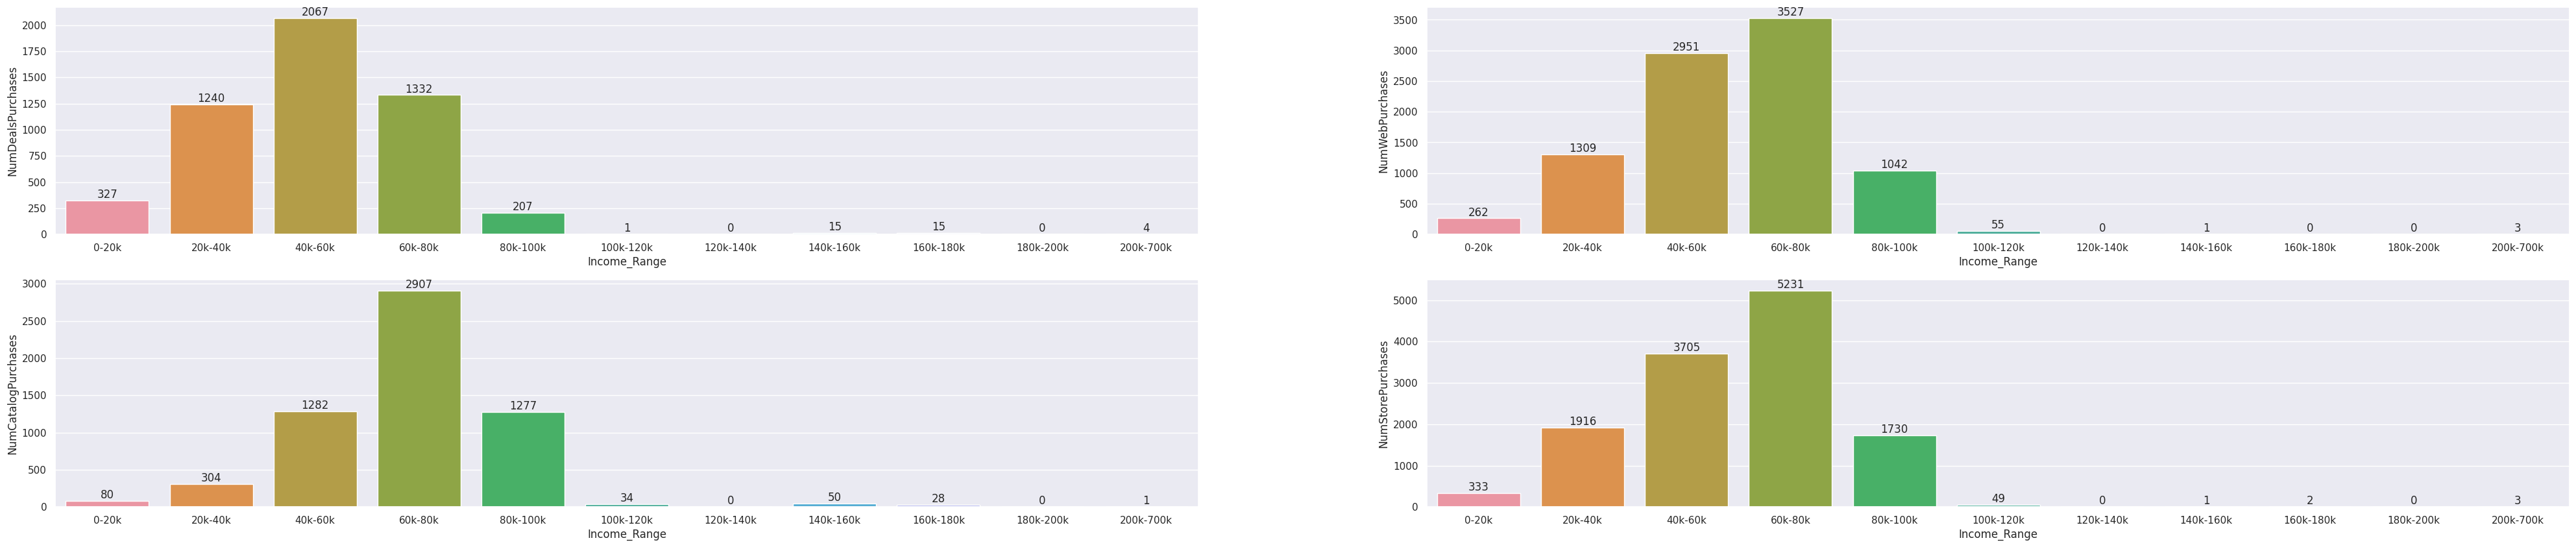

In [ ]:
plt.subplot(2, 2, 1)
sns.set(rc={'figure.figsize':(50,10)})
inc_deal = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumDealsPurchases'].sum().sort_values(by='NumDealsPurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumDealsPurchases' ,data = inc_deal)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 2, 2)
sns.set(rc={'figure.figsize':(50,10)})
inc_web = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumWebPurchases'].sum().sort_values(by='NumWebPurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumWebPurchases' ,data = inc_web)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 2, 3)
sns.set(rc={'figure.figsize':(50,10)})
inc_cat = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumCatalogPurchases'].sum().sort_values(by='NumCatalogPurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumCatalogPurchases' ,data = inc_cat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 2, 4)
sns.set(rc={'figure.figsize':(50,10)})
inc_store = Superstore_Data.groupby(['Income_Range'], as_index=False)['NumStorePurchases'].sum().sort_values(by='NumStorePurchases', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'NumStorePurchases' ,data = inc_store)
for bars in ax.containers:
    ax.bar_label(bars)

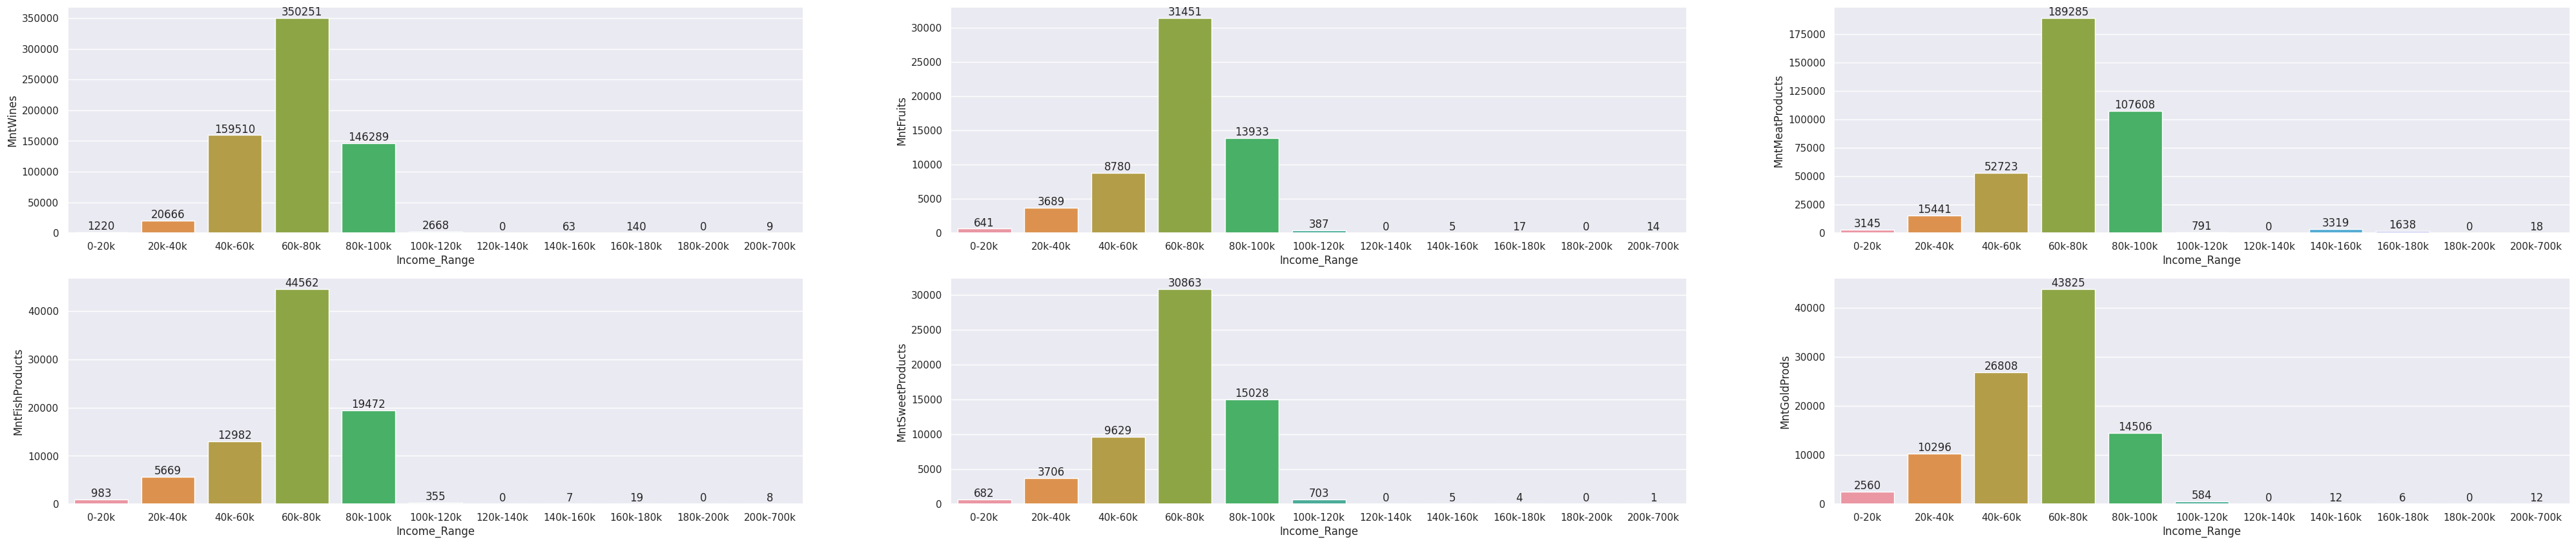

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(50,10)})
inc_wine = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntWines' ,data = inc_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(50,10)})
inc_fruit = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntFruits' ,data = inc_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(50,10)})
inc_meat = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntMeatProducts' ,data = inc_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(50,10)})
inc_fish = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntFishProducts' ,data = inc_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(50,10)})
inc_sweet = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntSweetProducts' ,data = inc_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(50,10)})
inc_gold = Superstore_Data.groupby(['Income_Range'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Income_Range', y= 'MntGoldProds' ,data = inc_gold)
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Distribution of Complain of Superstore customers')

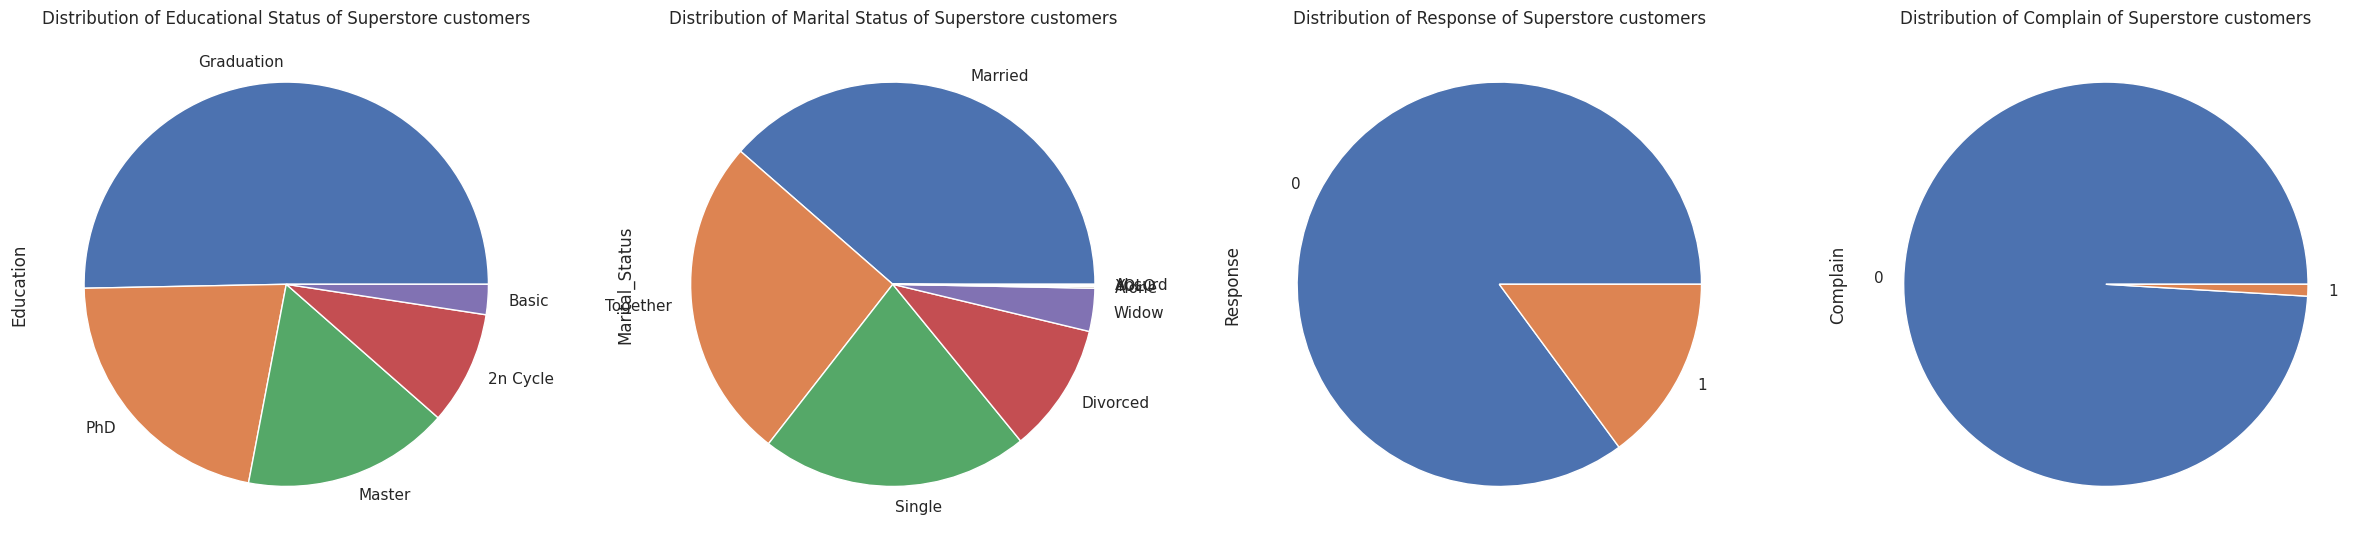

In [ ]:
plt.subplot(1, 4, 1)
Superstore_Data["Education"].value_counts(dropna=False).plot(kind="pie")
plt.title('Distribution of Educational Status of Superstore customers')

plt.subplot(1, 4, 2)
Superstore_Data["Marital_Status"].value_counts(dropna=False).plot(kind="pie")
plt.title('Distribution of Marital Status of Superstore customers')

plt.subplot(1, 4, 3)
Superstore_Data["Response"].value_counts(dropna=False).plot(kind="pie")
plt.title('Distribution of Response of Superstore customers')

plt.subplot(1, 4, 4)
Superstore_Data["Complain"].value_counts(dropna=False).plot(kind="pie")
plt.title('Distribution of Complain of Superstore customers')

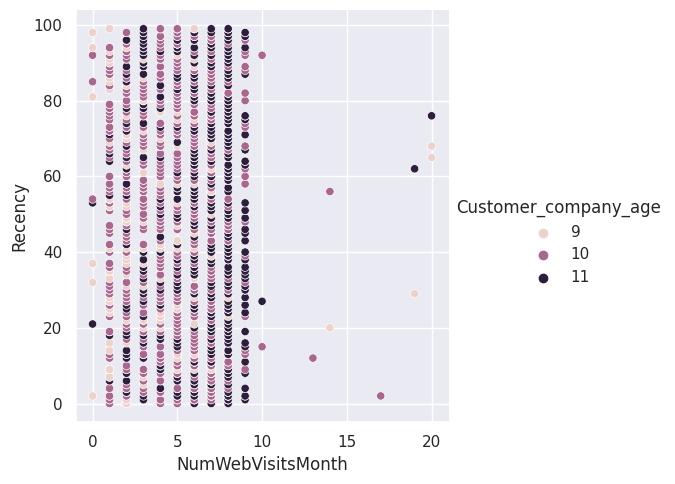

In [ ]:
sns.relplot(data=Superstore_Data, x="NumWebVisitsMonth", y="Recency", hue="Customer_company_age")

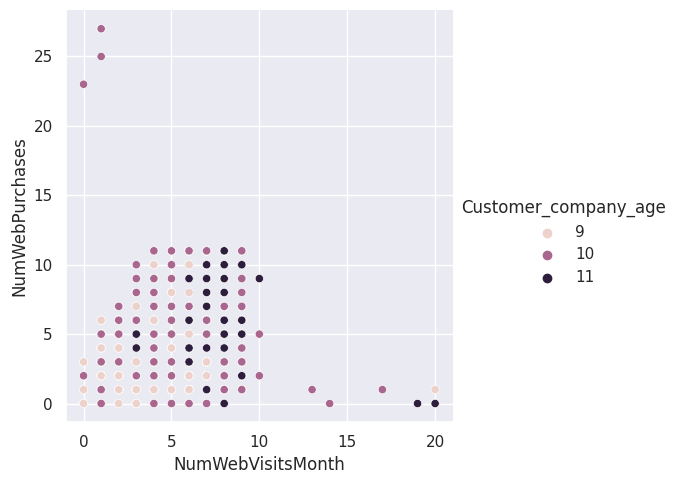

In [ ]:
sns.relplot(data=Superstore_Data, x="NumWebVisitsMonth", y="NumWebPurchases", hue="Customer_company_age") #

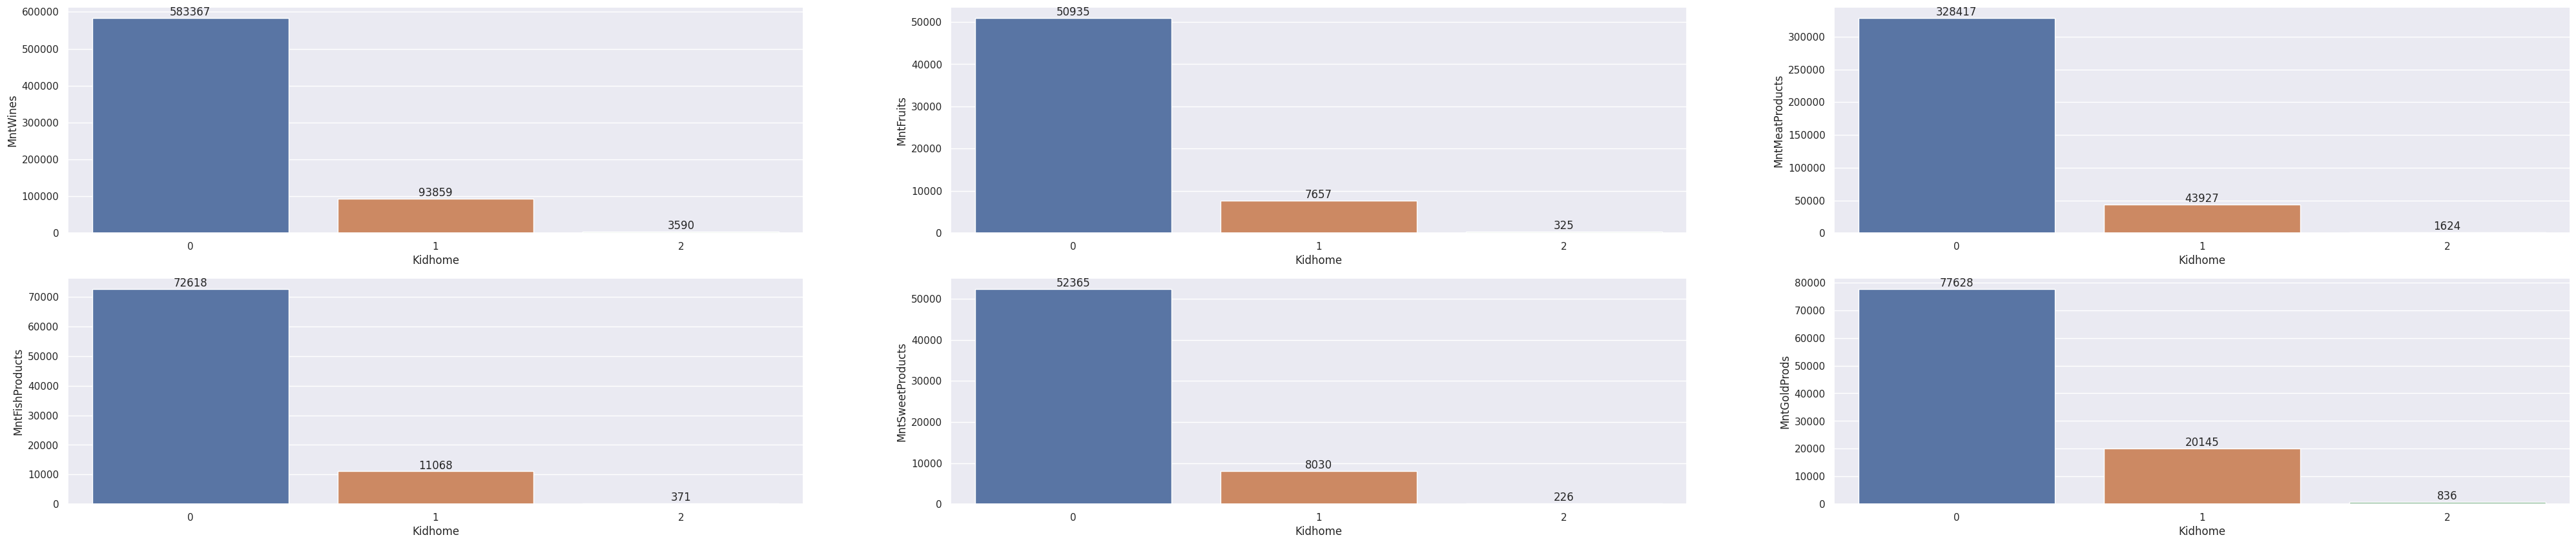

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(50,10)})
kid_wine = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntWines' ,data = kid_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(50,10)})
kid_fruit = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntFruits' ,data = kid_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(50,10)})
kid_meat = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntMeatProducts' ,data = kid_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(50,10)})
kid_fish = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntFishProducts' ,data = kid_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(50,10)})
kid_sweet = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntSweetProducts' ,data = kid_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(50,10)})
kid_gold = Superstore_Data.groupby(['Kidhome'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Kidhome', y= 'MntGoldProds' ,data = kid_gold)
for bars in ax.containers:
    ax.bar_label(bars)

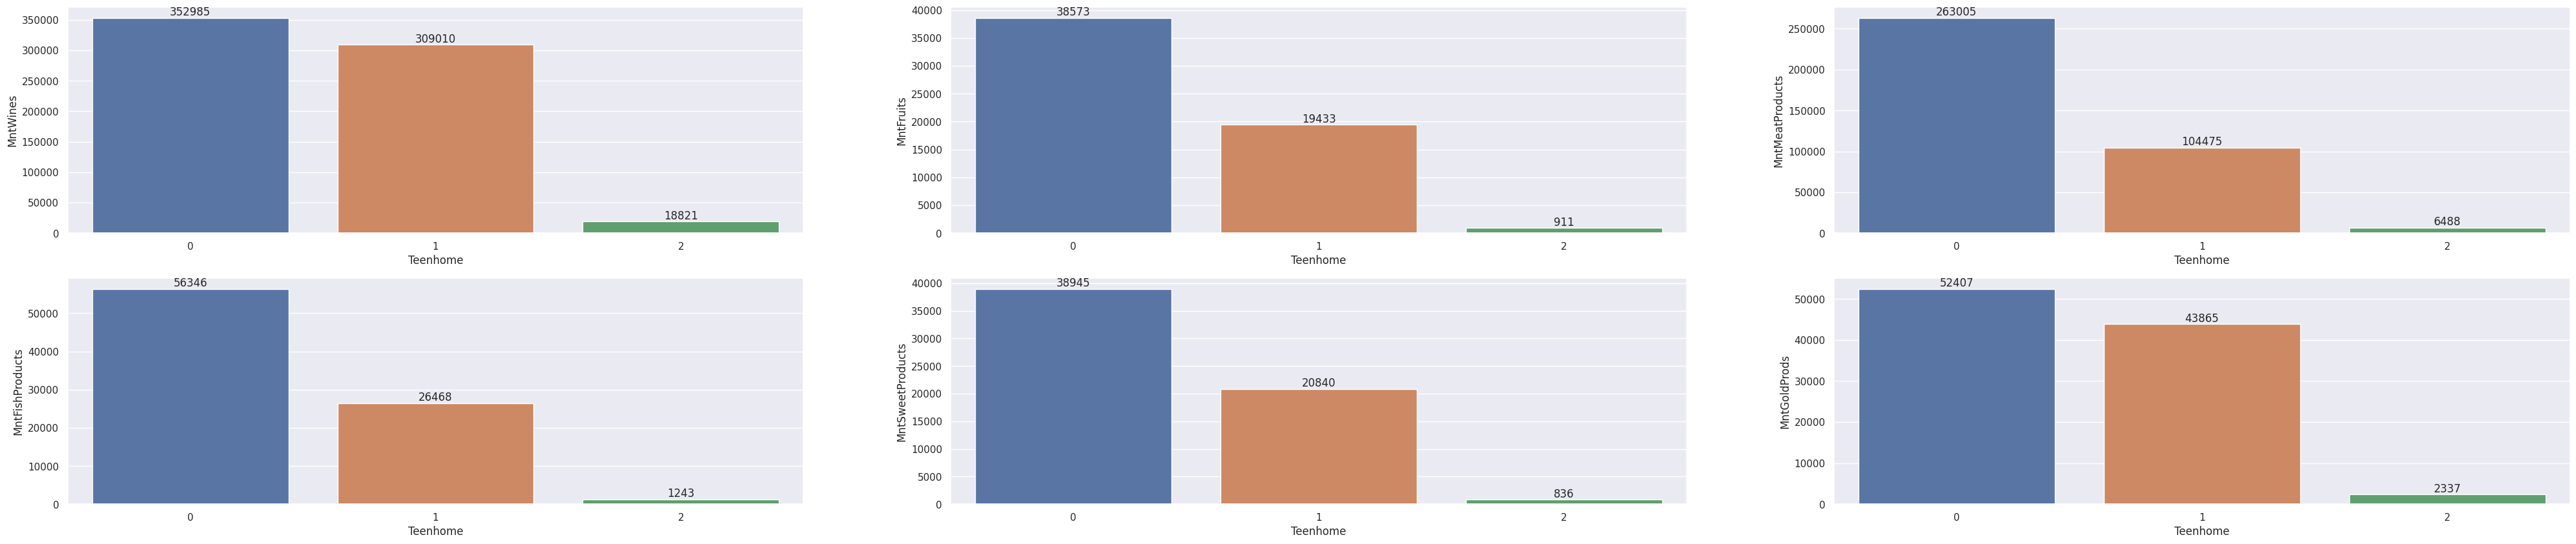

In [ ]:
plt.subplot(2, 3, 1)
sns.set(rc={'figure.figsize':(50,10)})
teen_wine = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntWines'].sum().sort_values(by='MntWines', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntWines' ,data = teen_wine)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 2)
sns.set(rc={'figure.figsize':(50,10)})
teen_fruit = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntFruits'].sum().sort_values(by='MntFruits', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntFruits' ,data = teen_fruit)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 3)
sns.set(rc={'figure.figsize':(50,10)})
teen_meat = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntMeatProducts'].sum().sort_values(by='MntMeatProducts', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntMeatProducts' ,data = teen_meat)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 4)
sns.set(rc={'figure.figsize':(50,10)})
teen_fish = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntFishProducts'].sum().sort_values(by='MntFishProducts', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntFishProducts' ,data = teen_fish)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 5)
sns.set(rc={'figure.figsize':(50,10)})
teen_sweet = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntSweetProducts'].sum().sort_values(by='MntSweetProducts', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntSweetProducts' ,data = teen_sweet)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(2, 3, 6)
sns.set(rc={'figure.figsize':(50,10)})
teen_gold = Superstore_Data.groupby(['Teenhome'], as_index=False)['MntGoldProds'].sum().sort_values(by='MntGoldProds', ascending=False)
ax = sns.barplot(x = 'Teenhome', y= 'MntGoldProds' ,data = teen_gold)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# prompt: customer segmentation

# Superstore_Data['segment'] = pd.qcut(Superstore_Data['Income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
# Superstore_Data.groupby('segment').agg(['mean', 'std'])


<ipython-input-13-8beb39f47a94>:4: FutureWarning: ['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Response', 'Complain'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Superstore_Data.groupby('segment').agg(['mean', 'std'])


Id                     Income                  Recency             \
          mean          std          mean           std       mean        std   
segment                                                                         
Low        inf  3232.328664  25296.583929   7433.691361  48.005357  28.992658   
Medium     inf  3310.849045  43323.755357   4775.826229  49.907143  29.361213   
High       inf  3281.011416  59918.100058   4888.240423  49.733929  28.051746   
Very High  inf  3164.997052  80450.566071  27308.609941  48.791071  29.459974   

             MntWines              MntFruits             ...  \
                 mean         std       mean        std  ...   
segment                                                  ...   
Low         21.935714   35.286501   5.910714  11.551668  ...   
Medium     130.426786  156.417753   8.033929  14.722134  ...   
High       427.821429  287.612932  30.650000  40.715853  ...   
Very High  635.558929  331.655133  60.614286  48.774841  ...   

          NumCatalogPurchases           NumStorePurchases            \
                         mean       std              mean       std   
segment                                                               
Low                  0.473214  1.321081          2.966071  0.988625   
Medium               1.189286  1.531970          4.258929  1.953601   
High                 3.280357  2.240857          7.583929  2.978172   
Very High            5.705357  2.911449          8.351786  2.921054   

          NumWebVisitsMonth           Customer_Age             \
                       mean       std         mean        std   
segment                                                         
Low                7.000000  2.024006    49.044643  10.675561   
Medium             6.330357  1.623775    55.030357  11.379491   
High               5.008929  1.935894    57.587500  10.997456   
Very High          2.926786  1.849430    55.114286  13.083924   

          Customer_company_age            
                          mean       std  
segment                                   
Low                   9.930357  0.679740  
Medium                9.914286  0.673928  
High                  9.982143  0.689587  
Very High             9.892857  0.689263  

[4 rows x 32 columns]

In [ ]:
Income = Superstore_Data['Income']
Superstore_Data['Income_Range_2'] = pd.cut(x = Income, bins=[0, 20000, 40000, 60000, 80000, 100000, 160000, 700000],
                     labels=['0-20k', '20k-40k', '40k-60k',
                             '60k-80k', '80k-100k', '100k-160k', '160k-700k'])
print(Superstore_Data['Income_Range_2'].value_counts())

40k-60k      667
60k-80k      624
20k-40k      605
80k-100k     204
0-20k        127
100k-160k     10
160k-700k      3
Name: Income_Range_2, dtype: int64


In [ ]:
income_store = Superstore_Data.groupby(['Income_Range_2'], as_index=False)['NumStorePurchases'].count().groupby(['NumStorePurchases'], as_index=False)['NumStorePurchases'].count()
income_store

Income_Range_2  NumStorePurchases
0          0-20k                127
1        20k-40k                605
2        40k-60k                667
3        60k-80k                624
4       80k-100k                204
5      100k-160k                 10
6      160k-700k                  3

In [ ]:
Superstore_Data['HealthConsious'] = Superstore_Data['MntFruits'] + Superstore_Data['MntFishProducts']
Superstore_Data['Family'] = Superstore_Data['MntFruits'] + Superstore_Data['MntMeatProducts'] + Superstore_Data['MntFishProducts'] + Superstore_Data['MntSweetProducts']
Superstore_Data['Lavish'] = Superstore_Data['MntWines'] + Superstore_Data['MntGoldProds'] + Superstore_Data['MntMeatProducts']


In [ ]:
Health = Superstore_Data['Health Consious']
Superstore_Data['Health'] = pd.cut(x = Health, bins=[0, 200, 500],
                     labels=['No', 'Yes'])
print(Superstore_Data['Health'].value_counts())

No     1842
Yes     206
Name: Health, dtype: int64


In [ ]:
Family_yes = Superstore_Data['Family']
Superstore_Data['Family_yes'] = pd.cut(x = Family_yes, bins=[0, 200, 500],
                     labels=['No', 'Yes'])
print(Superstore_Data['Family_yes'].value_counts())

No     1382
Yes     394
Name: Family_yes, dtype: int64


In [ ]:
df.groupby(['col5', 'col2']).size()

In [ ]:
Superstore_Data.head(20)

Id Year_Birth   Education Marital_Status   Income Kidhome Teenhome  \
0    1826 1970-01-01  Graduation       Divorced  84835.0       0        0   
1       1 1961-01-01  Graduation         Single  57091.0       0        0   
2   10476 1958-01-01  Graduation        Married  67267.0       0        1   
3    1386 1967-01-01  Graduation       Together  32474.0       1        1   
4    5371 1989-01-01  Graduation         Single  21474.0       1        0   
5    7348 1958-01-01         PhD         Single  71691.0       0        0   
6    4073 1954-01-01    2n Cycle        Married  63564.0       0        0   
7    1991 1967-01-01  Graduation       Together  44931.0       0        1   
8    4047 1954-01-01         PhD        Married  65324.0       0        1   
9    9477 1954-01-01         PhD        Married  65324.0       0        1   
10   2079 1947-01-01    2n Cycle        Married  81044.0       0        0   
11   5642 1979-01-01      Master       Together  62499.0       1        0   
12  10530 1959-01-01         PhD          Widow  67786.0       0        0   
13   2964 1981-01-01  Graduation        Married  26872.0       0        0   
14  10311 1969-01-01  Graduation        Married   4428.0       0        1   
15    837 1977-01-01  Graduation        Married  54809.0       1        1   
16  10521 1977-01-01  Graduation        Married  54809.0       1        1   
17  10175 1958-01-01         PhD       Divorced  32173.0       0        1   
18   1473 1960-01-01    2n Cycle         Single  47823.0       0        1   
19   2795 1958-01-01      Master         Single  30523.0       2        1   

   Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0   2014-06-16        0       189  ...                  6                  1   
1   2014-06-15        0       464  ...                  7                  5   
2   2014-05-13        0       134  ...                  5                  2   
3   2014-11-05        0        10  ...                  2                  7   
4   2014-08-04        0         6  ...                  2                  7   
5   2014-03-17        0       336  ...                  5                  2   
6   2014-01-29        0       769  ...                  7                  6   
7   2014-01-18        0        78  ...                  3                  5   
8   2014-11-01        0       384  ...                  9                  4   
9   2014-11-01        0       384  ...                  9                  4   
10  2013-12-27        0       450  ...                 10                  1   
11  2013-09-12        0       140  ...                  6                  4   
12  2013-07-12        0       431  ...                  6                  1   
13  2013-10-16        0         3  ...                  2                  6   
14  2013-05-10        0        16  ...                  0                  1   
15  2013-11-09        0        63  ...                  5                  4   
16  2013-11-09        0        63  ...                  5                  4   
17  2013-01-08        0        18  ...                  3                  4   
18  2013-07-23        0        53  ...                  3                  8   
19  2013-01-07        0         5  ...                  2                  7   

    Response  Complain  Customer_Age  Customer_company_age  HealthConsious  \
0          1         0            53                     9             215   
1          1         0            62                     9              12   
2          0         0            65                     9              26   
3          0         0            56                     9               0   
4          1         0            34                     9              27   
5          1         0            65                     9             370   
6          1         0            69                     9              95   
7          0         0            56                     9               0   
8     

In [ ]:
#Superstore_Data['Segment'] = max(Superstore_Data['Health Consious'], Superstore_Data['Family'], Superstore_Data['Lavish'], axis=1)
#Superstore_Data['Segment'] = Superstore_Data[["Health Consious", "Family", "Lavish"]].max(axis=1)
#Superstore_Data['Segment'][0]

Superstore_Data["Segment"] = ""

# for i in range(2240):
#   if Superstore_Data['HealthConsious'][i] > Superstore_Data['Family'][i] and Superstore_Data['Lavish'][i]:
#     Superstore_Data['Segment'][i] = 'Health Consious'
#   elif Superstore_Data['Family'][i] > Superstore_Data['HealthConsious'][i] and Superstore_Data['Lavish'][i]:
#     Superstore_Data['Segment'][i] = 'Family'
#   else:
#     Superstore_Data['Segment'][i] = 'Lavish'

for i in range(2240):
  if max(Superstore_Data['HealthConsious'][i], Superstore_Data['Family'][i], Superstore_Data['Lavish'][i]) == Superstore_Data['HealthConsious'][i]:
    Superstore_Data['Segment'][i] = 'Health Consious'
  elif max(Superstore_Data['HealthConsious'][i], Superstore_Data['Family'][i], Superstore_Data['Lavish'][i]) == Superstore_Data['Family'][i]:
    Superstore_Data['Segment'][i] = 'Family'
  else:
    Superstore_Data['Segment'][i] = 'Lavish'

<ipython-input-47-8ca58f4b84dc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Superstore_Data['Segment'][i] = 'Lavish'
<ipython-input-47-8ca58f4b84dc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Superstore_Data['Segment'][i] = 'Family'


In [ ]:
Superstore_Data['Segment'].value_counts()

Lavish    1973
Family     267
Name: Segment, dtype: int64

In [ ]:
Superstore_Data['HealthConsious'][0] > Superstore_Data['Family'][0] and Superstore_Data['Lavish'][0]

False

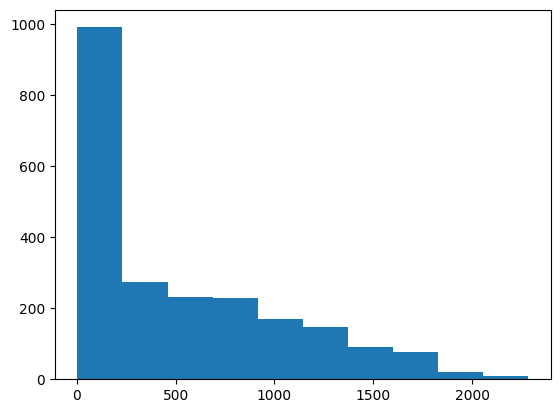

In [ ]:
plt.hist(Superstore_Data['Lavish'])
plt.show()

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍